In [1]:
import lightfm
import pandas as pd
from lightfm import LightFM
train = pd.read_csv('./ua.base', sep="\t", header=None)
train.columns = ['user_id', 'item_id', 'rating', 'timestamp']
train.user_id = train.user_id - 1
train.item_id = train.item_id - 1
test = pd.read_csv('./ua.test', sep="\t", header=None)
test.columns = ['user_id', 'item_id', 'rating', 'timestamp']
test.user_id = test.user_id - 1
test.item_id = test.item_id - 1
all_ratings = pd.read_csv('./u.data', sep="\t", header=None)
all_ratings.columns = ['user_id', 'item_id', 'rating', 'timestamp']
all_ratings.user_id = all_ratings.user_id - 1
all_ratings.item_id = all_ratings.item_id - 1
train = train.drop(['timestamp'], axis=1)
test = test.drop(['timestamp'], axis=1)

D:\anaconda_3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [2]:
from lightfm.data import Dataset
import numpy as np
dataset = Dataset()
dataset.fit(users=np.unique(all_ratings['user_id']), items=np.unique(all_ratings['item_id']))
_, interactions_train = dataset.build_interactions([tuple(i) for i in train.to_numpy()])
_, interactions_test = dataset.build_interactions([tuple(i) for i in test.to_numpy()])

In [3]:
import math

def RMSE(test, model):
    y_pred = model.predict(test.user_id.values, test.item_id.values)
    y_true = test.rating
    s = 0
    for i in range(len(y_pred)):
        s += (y_true[i] - y_pred[i]) ** 2
    return math.sqrt(s / len(y_true))

In [9]:
epochs = [x for x in range(1, 200, 30)]
components = [x for x in range(2, 201, 32)]

results = pd.DataFrame(columns=['epochs', 'components', 'train_res', 'test_res'])
for e in epochs[:]:
    for c in components[:]:
        model = LightFM(no_components=c, random_state=42)
        model.fit(interactions_train, epochs=e)
        results = results.append(
            {
                'epochs': e,
                'components': c,
                'train_res': RMSE(train, model),
                'test_res': RMSE(test, model)
        
            }, ignore_index=True        
        )
        print(e, c)

1 2
1 34
1 66
1 98
1 130
1 162
1 194
31 2
31 34
31 66
31 98
31 130
31 162
31 194
61 2
61 34
61 66
61 98
61 130
61 162
61 194
91 2
91 34
91 66
91 98
91 130
91 162
91 194
121 2
121 34
121 66
121 98
121 130
121 162
121 194
151 2
151 34
151 66
151 98
151 130
151 162
151 194
181 2
181 34
181 66
181 98
181 130
181 162
181 194


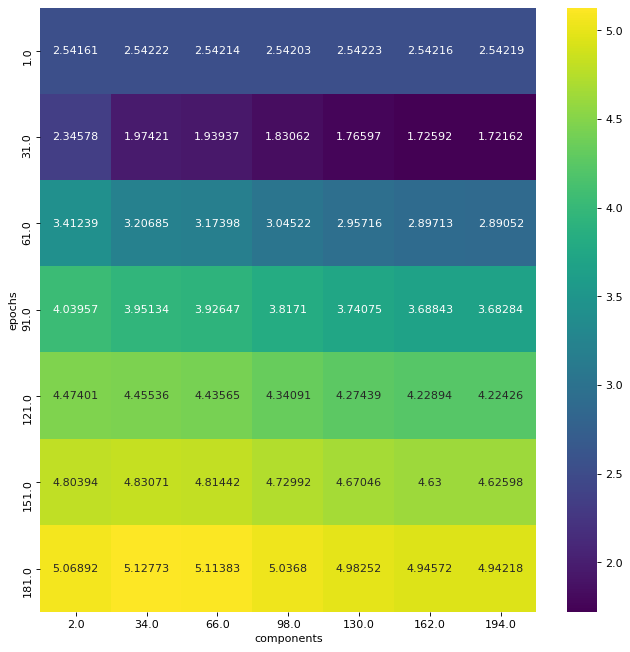

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
to_show = results.pivot(index='epochs', columns='components', values='test_res')
sns.heatmap(to_show, annot=True, fmt="g", cmap='viridis')
plt.show()

In [ ]:
# i should reaserch more detailed interval [1..40] for epochs and [40..190] for components

In [4]:
epochs = [x for x in range(1, 40, 6)]
components = [x for x in range(40, 190, 30)]

results = pd.DataFrame(columns=['epochs', 'components', 'train_res', 'test_res'])
for e in epochs[:]:
    for c in components[:]:
        model = LightFM(no_components=c, random_state=42)
        model.fit(interactions_train, epochs=e)
        results = results.append(
            {
                'epochs': e,
                'components': c,
                'train_res': RMSE(train, model),
                'test_res': RMSE(test, model)
        
            }, ignore_index=True        
        )
        print(e, c)

1 40
1 70
1 100
1 130
1 160
7 40
7 70
7 100
7 130
7 160
13 40
13 70
13 100
13 130
13 160
19 40
19 70
19 100
19 130
19 160
25 40
25 70
25 100
25 130
25 160
31 40
31 70
31 100
31 130
31 160
37 40
37 70
37 100
37 130
37 160


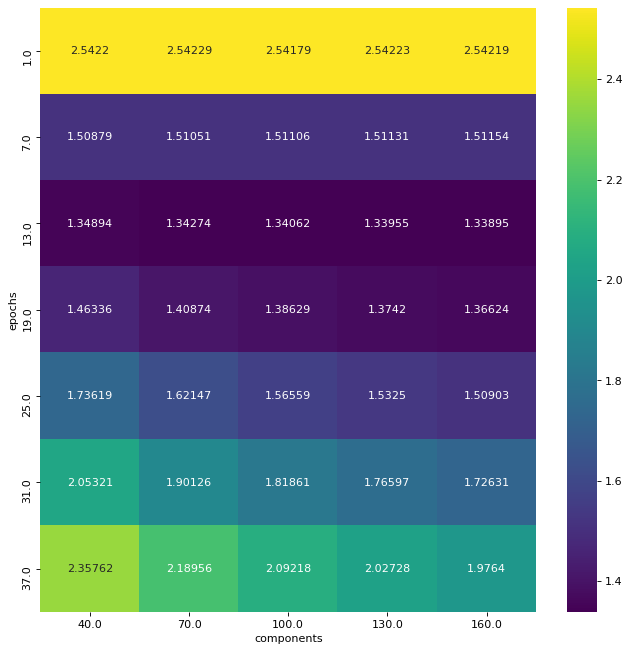

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
to_show = results.pivot(index='epochs', columns='components', values='test_res')
sns.heatmap(to_show, annot=True, fmt="g", cmap='viridis')
plt.show()

In [7]:
# i should reaserch more detailed interval [7..19] for epochs and [70..130] for components

In [8]:
epochs = [x for x in range(7, 19, 2)]
components = [x for x in range(70, 130, 10)]

results = pd.DataFrame(columns=['epochs', 'components', 'train_res', 'test_res'])
for e in epochs[:]:
    for c in components[:]:
        model = LightFM(no_components=c, random_state=42)
        model.fit(interactions_train, epochs=e)
        results = results.append(
            {
                'epochs': e,
                'components': c,
                'train_res': RMSE(train, model),
                'test_res': RMSE(test, model)
        
            }, ignore_index=True        
        )
        print(e, c)

7 70
7 80
7 90
7 100
7 110
7 120
9 70
9 80
9 90
9 100
9 110
9 120
11 70
11 80
11 90
11 100
11 110
11 120
13 70
13 80
13 90
13 100
13 110
13 120
15 70
15 80
15 90
15 100
15 110
15 120
17 70
17 80
17 90
17 100
17 110
17 120


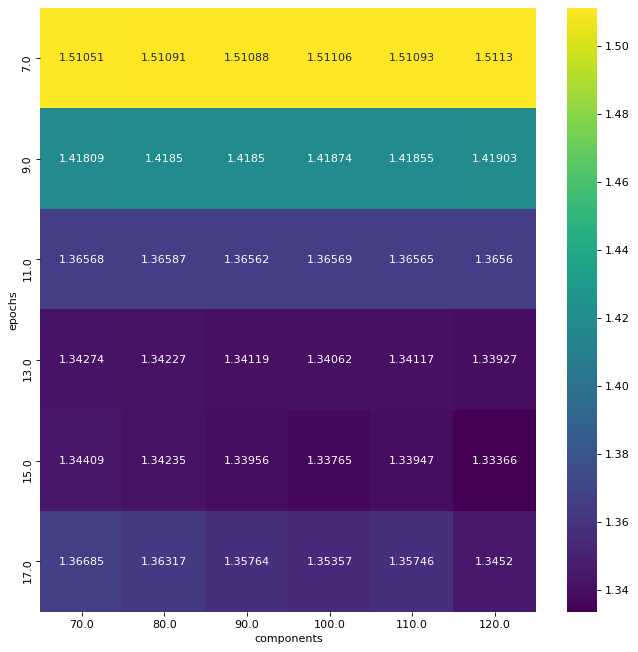

In [9]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
to_show = results.pivot(index='epochs', columns='components', values='test_res')
sns.heatmap(to_show, annot=True, fmt="g", cmap='viridis')
plt.show()

In [10]:
# i should reaserch more detailed interval [12..16] for epochs and [90..110] for components

In [11]:
epochs = [x for x in range(12, 16)]
components = [x for x in range(90, 110, 5)]

results = pd.DataFrame(columns=['epochs', 'components', 'train_res', 'test_res'])
for e in epochs[:]:
    for c in components[:]:
        model = LightFM(no_components=c, random_state=42)
        model.fit(interactions_train, epochs=e)
        results = results.append(
            {
                'epochs': e,
                'components': c,
                'train_res': RMSE(train, model),
                'test_res': RMSE(test, model)
        
            }, ignore_index=True        
        )
        print(e, c)

12 90
12 95
12 100
12 105
13 90
13 95
13 100
13 105
14 90
14 95
14 100
14 105
15 90
15 95
15 100
15 105


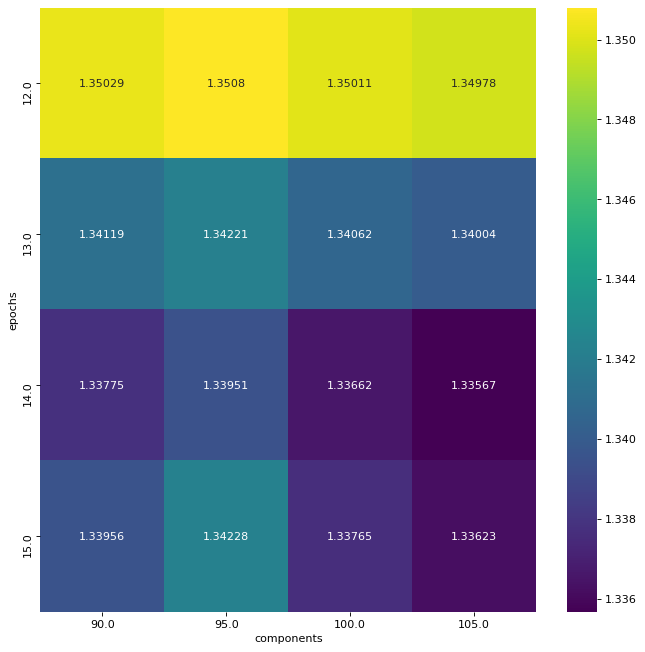

In [12]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
to_show = results.pivot(index='epochs', columns='components', values='test_res')
sns.heatmap(to_show, annot=True, fmt="g", cmap='viridis')
plt.show()

In [ ]:
# min error is for 14 epochs and 105 components